In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.datasets import make_regression
plt.style.use('seaborn')

/Users/harshit/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
#Data Processing and Reshaping
from sklearn.datasets import make_regression
x,y = make_regression(n_features=1,n_samples=5000,bias=4,noise=15)
# Normalisation 
x = (x - x.mean())/x.std()
dummy_feature_x0=np.ones((x.shape[0],1))
x=np.hstack((dummy_feature_x0,x))
print(x.shape,y.shape)

(5000, 2) (5000,)


In [13]:
def hypothesis(x,theta):
    return np.dot(x,theta)
def error(x,y,theta):
    y_=hypothesis(x,theta)
    return np.sum((y_-y)**2)/x.shape[0]
def gradient(x,y,theta):
    y_=hypothesis(x,theta)
    grad=np.dot(x.T,(y_-y))
    return grad/x.shape[0]
def mini_batch_gradientDescent(x,y,theta,batch_size=200,learning_rate=0.01,max_steps=100):
    error_=[]
    data=np.hstack((x,y.reshape(-1,1)))
    for i in range(max_steps):
        np.random.shuffle(data)
        m=data.shape[0]
        total_batches=m//batch_size
        for i in range(total_batches):
            batch_data=data[i*batch_size:(i+1)*batch_size,:]
            x_batch=batch_data[:,:-1]
            y_batch=batch_data[:,-1]
            batch_grad=gradient(x_batch,y_batch,theta)
            theta=theta-learning_rate*batch_grad
            error_.append(error(x_batch,y_batch,theta))
    return error_,theta
def gradientDescent(x,y,theta,learning_rate=0.1,max_steps=100):
    error_=[]
    for i in range(max_steps):
        grad=gradient(x,y,theta)
        theta=theta-learning_rate*grad
        error_.append(error(x,y,theta))
    return error_,theta
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

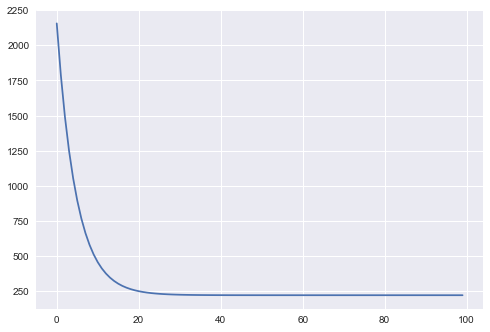

91.74928186078448


In [14]:
theta=np.ones((x.shape[1],))
error_,theta=gradientDescent(x,y,theta,0.1,100)

plt.plot(error_)
plt.show()

print(r2_score(y,hypothesis(x,theta)))

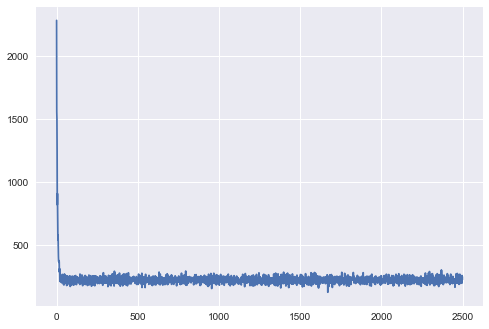

91.74639904122634


In [20]:
theta=np.ones((x.shape[1],))
error_,theta=mini_batch_gradientDescent(x,y,theta,200,0.1,100)

plt.plot(error_)
plt.show()

print(r2_score(y,hypothesis(x,theta)))

In [ ]:
#with same no of max steps mini batch grad converged earlier. see in graph